### Imports

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from tqdm import tqdm
import sys
sys.path.append("../scripts")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

from pandas.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score

#from functions import upsample_data, downsample_data

### Read training dataframe

In [2]:
df = pd.read_csv("../results/dataset_train_features.csv")
test_df = pd.read_csv("../results/dataset_test_features.csv")

In [3]:
#df = downsample_data(df, thr = min(df.groupby("label")["label"].count())) # this will make the classifier more balanced but less accurate
df.reset_index(drop = True, inplace = True)
test_df.reset_index(drop = True, inplace = True)

### Feature names

In [4]:
n_mfcc = 10

feature_names = [
    'zcr',
    'rms',
    'spectral_centroid',
    'spectral_bandwidth',
    'spectral_flatness',
    'spectral_rolloff',
    'mean',
    'std_dev',
    'skewness',
    'kurtosis'
] + [f'mfcc_{i+1}' for i in range(n_mfcc)
] + [f'spectral_contrast{i+1}' for i in range(7)
] + [f'chroma{i+1}' for i in range(12)
] + [f'tonnetz{i+1}' for i in range(6)]

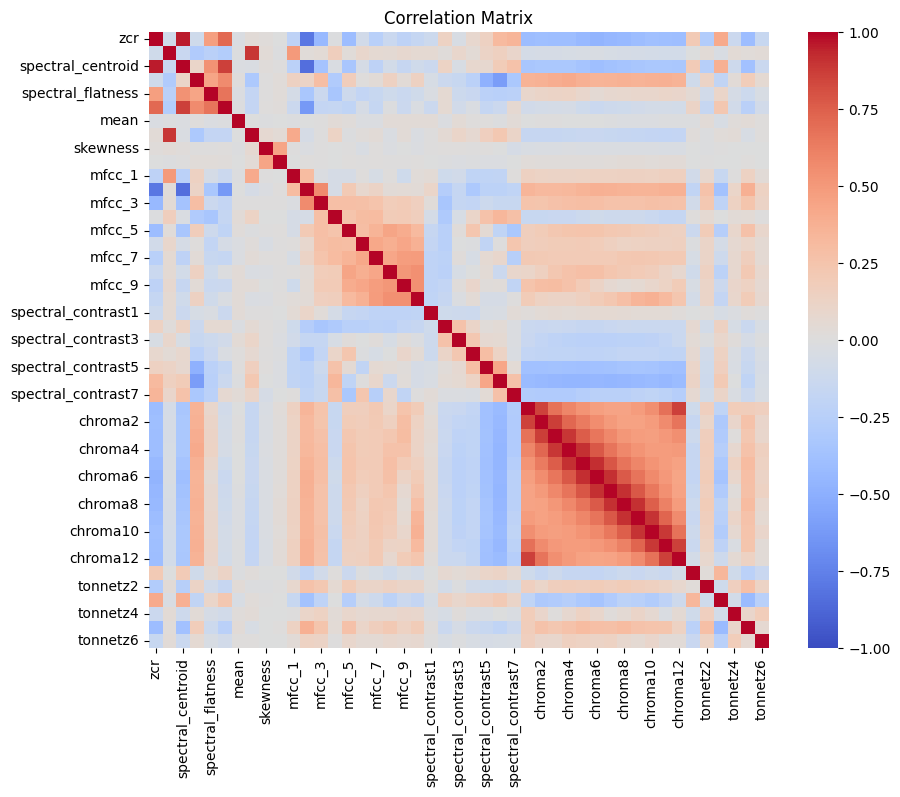

In [5]:
corr_matrix = df[feature_names].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Train knn's

In [6]:
def evaluate_knn(df):
    #scatter_matrix(df[feature_names], c=df.label, alpha=0.8, figsize=(30, 30), s=20);
    #plt.show()
    df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
    print("# Neighbors \t Accuracy")
    for i in range(1,16):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(df_train[feature_names], df_train.label)
        preds = knn.predict(df_test[feature_names])
        print(f"{i} \t\t {len(preds[preds == df_test.label])/len(preds)*100:.2f} %")

In [7]:
evaluate_knn(df)

# Neighbors 	 Accuracy
1 		 10.49 %
2 		 9.37 %
3 		 9.62 %
4 		 9.19 %
5 		 9.62 %
6 		 9.87 %
7 		 9.80 %
8 		 10.05 %
9 		 10.34 %
10 		 10.27 %
11 		 10.02 %
12 		 10.31 %
13 		 10.38 %
14 		 10.23 %
15 		 10.23 %


## Rescaling of input features

In [8]:
minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[feature_names] = pd.DataFrame(minmax.fit_transform(X = df_minmax[feature_names]), columns=feature_names)
evaluate_knn(df_minmax)

# Neighbors 	 Accuracy
1 		 29.05 %
2 		 24.61 %
3 		 25.91 %
4 		 26.70 %
5 		 27.93 %
6 		 28.32 %
7 		 28.61 %
8 		 28.11 %
9 		 28.47 %
10 		 28.11 %
11 		 28.36 %
12 		 27.96 %
13 		 28.47 %
14 		 28.00 %
15 		 28.32 %


In [9]:
standard = StandardScaler()
df_std = df.copy()
df_std[feature_names] = pd.DataFrame(standard.fit_transform(X = df_std[feature_names]), columns=feature_names)
evaluate_knn(df_std)

# Neighbors 	 Accuracy
1 		 29.91 %
2 		 26.09 %
3 		 26.13 %
4 		 26.95 %
5 		 27.68 %
6 		 27.50 %
7 		 27.89 %
8 		 28.43 %
9 		 28.83 %
10 		 28.68 %
11 		 28.97 %
12 		 28.76 %
13 		 28.58 %
14 		 29.51 %
15 		 29.19 %


In [10]:
robust = RobustScaler()
df_robust = df.copy()
df_robust[feature_names] = pd.DataFrame(robust.fit_transform(X = df_robust[feature_names]), columns=feature_names)
evaluate_knn(df_robust)

# Neighbors 	 Accuracy
1 		 25.84 %
2 		 21.98 %
3 		 22.38 %
4 		 23.14 %
5 		 24.29 %
6 		 24.43 %
7 		 24.14 %
8 		 24.58 %
9 		 24.54 %
10 		 24.00 %
11 		 23.82 %
12 		 23.68 %
13 		 23.71 %
14 		 23.78 %
15 		 24.07 %


In [11]:
normalizer = Normalizer()
df_norm = df.copy()
df_norm[feature_names] = pd.DataFrame(normalizer.fit_transform(X = df_norm[feature_names]), columns=feature_names)
evaluate_knn(df_norm)

# Neighbors 	 Accuracy
1 		 12.54 %
2 		 11.60 %
3 		 11.35 %
4 		 11.78 %
5 		 12.50 %
6 		 12.14 %
7 		 12.14 %
8 		 12.40 %
9 		 12.22 %
10 		 12.43 %
11 		 11.93 %
12 		 11.96 %
13 		 12.14 %
14 		 12.32 %
15 		 12.36 %


In [12]:
quant = QuantileTransformer(output_distribution='normal')
df_quant = df.copy()
df_quant[feature_names] = pd.DataFrame(quant.fit_transform(X = df_quant[feature_names]), columns=feature_names)
evaluate_knn(df_quant)

# Neighbors 	 Accuracy
1 		 30.49 %
2 		 26.99 %
3 		 27.24 %
4 		 27.24 %
5 		 28.07 %
6 		 29.55 %
7 		 29.95 %
8 		 29.59 %
9 		 29.26 %
10 		 29.33 %
11 		 29.73 %
12 		 29.26 %
13 		 29.55 %
14 		 30.09 %
15 		 30.70 %


## PCA

In [13]:
pca = PCA(.95)
principal_components = pca.fit_transform(df_std[feature_names])

Before PCA: 45 components
After PCA: 28 components, 95.41 % information


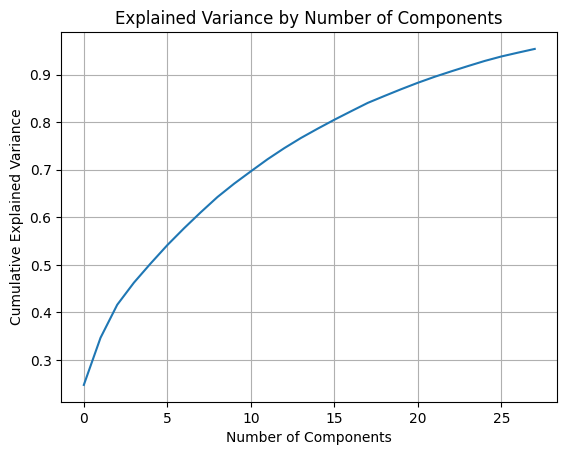

In [14]:
# Check the shape of the transformed data
print(f"Before PCA: {len(feature_names)} components")
print(f"After PCA: {principal_components.shape[1]} components, {np.sum(pca.explained_variance_ratio_)*100:.2f} % information")

# Plot the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid()
plt.show()

In [15]:
def evaluate_pca(pca):
    #scatter_matrix(pca, c=df.label, alpha=0.8, figsize=(30, 30), s=20);
    #plt.show()'
    X_train, X_test, y_train, y_test = train_test_split(pca, df.label, test_size=0.2, random_state=42)
    print("# Neighbors \t Accuracy")
    for i in range(1,16):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        print(f"{i} \t\t {len(preds[preds == y_test])/len(preds)*100:.2f} %")

In [16]:
df_pca = pd.DataFrame(principal_components)
evaluate_pca(df_pca)

# Neighbors 	 Accuracy
1 		 28.14 %
2 		 24.29 %
3 		 25.48 %
4 		 26.23 %
5 		 26.34 %
6 		 27.21 %
7 		 27.06 %
8 		 26.88 %
9 		 26.99 %
10 		 27.42 %
11 		 27.21 %
12 		 27.71 %
13 		 28.11 %
14 		 28.25 %
15 		 28.76 %


In [17]:
pca3 = PCA(n_components=3)
principal_components3 = pca3.fit_transform(df_std[feature_names])

(13875, 3)


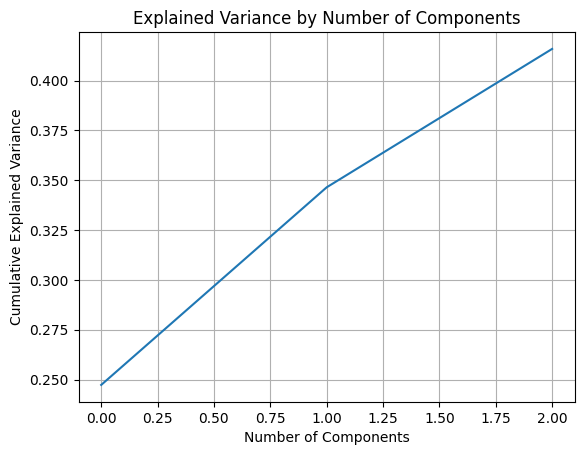

In [18]:
# Check the shape of the transformed data
print(principal_components3.shape)

# Plot the explained variance
plt.figure()
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid()
plt.show()

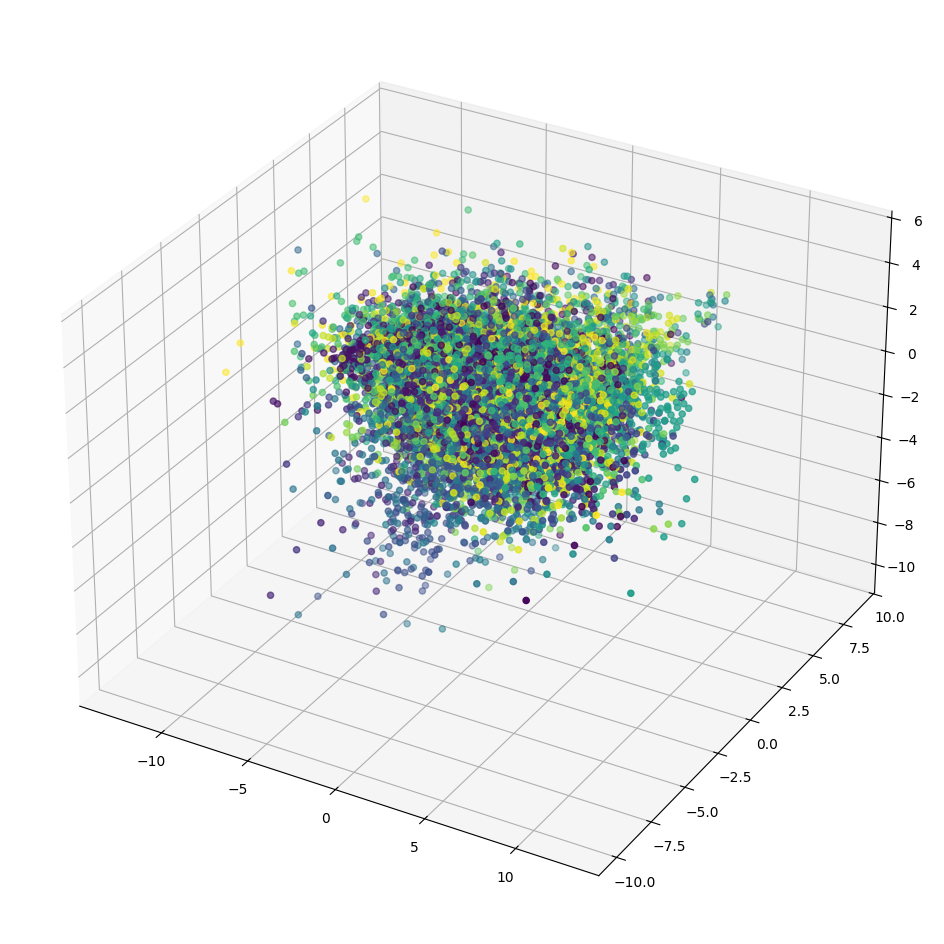

In [19]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
cmap = ListedColormap(sns.color_palette("hsv", n_colors=46))
ax.scatter(principal_components[:,0], principal_components[:,1], principal_components[:,2], c = df.label)

# Train ensemble of knn classifiers

Here, no PCA is performed and the quantile transformed dataframe is used

In [36]:
def train_ensemble(X, y):
    classifier = []
    skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"Fitting classifier {i}")
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        acc = 0
        best_cl = None
        best_k = 0
        for i in tqdm(range(1,16)):
            knn = KNeighborsClassifier(n_neighbors=i)
            knn.fit(X_train, y_train)
            preds = knn.predict(X_test)
            if len(preds[preds == y_test])/len(preds) > acc:
                acc = len(preds[preds == y_test])/len(preds)
                best_cl = knn
                best_k = i
        classifier.append(best_cl)
        print(f"Fold {i}: Best value: k = {best_k}, accuracy: {acc*100:.2f} %")
    return classifier

In [37]:
knns = train_ensemble(np.array(df_quant[feature_names]), df_quant.label)

Fitting classifier 0


100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 14.55it/s]


Fold 15: Best value: k = 1, accuracy: 28.11 %
Fitting classifier 1


100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 13.74it/s]


Fold 15: Best value: k = 11, accuracy: 31.60 %
Fitting classifier 2


100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 17.85it/s]


Fold 15: Best value: k = 15, accuracy: 29.55 %
Fitting classifier 3


100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 18.45it/s]


Fold 15: Best value: k = 14, accuracy: 28.32 %
Fitting classifier 4


100%|███████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 16.63it/s]

Fold 15: Best value: k = 15, accuracy: 27.50 %


## Make predictions

In [38]:
def predict_ensemble(data, ensemble):
    preds = []
    for clf in ensemble:
        preds.append(clf.predict_proba(data))
    return np.mean(np.array(preds), axis = 0)

In [39]:
#test_df_std = test_df.copy()
#test_df_std[feature_names] = pd.DataFrame(standard.transform(X = test_df_std[feature_names]), columns=feature_names)
#
#test_pca = pca.transform(test_df_std[feature_names])

test_df_quant= test_df.copy()
test_df_quant[feature_names] = pd.DataFrame(quant.transform(X = test_df_quant[feature_names]), columns=feature_names)

In [40]:
preds = predict_ensemble(np.array(test_df_quant[feature_names]), knns)

In [41]:
preds_class = np.argmax(preds, axis = 1)

In [42]:
print(f"{len(preds_class[preds_class == test_df.label])/len(test_df)*100:.2f} % Accuracy")

33.49 % Accuracy


## Plots

Base score: 3.3371 %
Accuracy on test data: 33.4855 %
Balanced accuracy score on test data: 31.9464 %


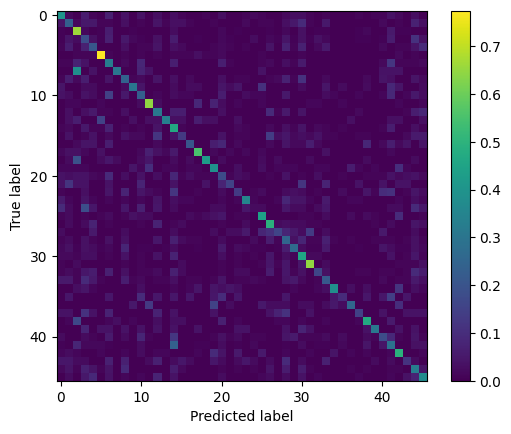

In [43]:
base_score = max(test_df.groupby('label')["label"].count())/len(test_df)
print(f"Base score: {base_score*100:.4f} %")
print(f"Accuracy on test data: {accuracy_score(test_df.label, preds_class)*100:.4f} %")
print(f"Balanced accuracy score on test data: {balanced_accuracy_score(test_df.label, preds_class)*100:.4f} %")
cm_test = confusion_matrix(test_df.label, preds_class, normalize = "true")

plt.imshow(cm_test, interpolation='nearest', cmap="viridis")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label');

plt.savefig("../../plots/cm_knn.pdf")